<a href="https://colab.research.google.com/github/santoshkumarpottumuthu/Sentimental-Analysis-Project/blob/master/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textblob import TextBlob
import sys
import re


In [0]:
from wordcloud import WordCloud 

In [0]:
#defining the keys ---from twitter api
Consumer_Key = "qhfac9zsMmUCa8GkMLOYM21hg"
Consumer_Secret = "PNgSjpiu4rEHO2FkIri4mseCksGvxGFFbb0LluwrBUOhvtsGiI"
Access_token = "472099927-B03YMYZ8R88OTnQGIxvEN45mfrg2rNaUJNzP222K"
Access_token_Secret = "oE8fAROsHENZzCNfozla6z6t6elgllhU0eeRBBLi2Iovq"

In [0]:
#creating the authentication
auth = tweepy.OAuthHandler(consumer_key= Consumer_Key,consumer_secret=Consumer_Secret)
auth.set_access_token(Access_token,Access_token_Secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [0]:
#asking user to enter the keyword and number of tweets to be analysed.
search_word = input("Enter the Keyword/hashtag to be searched:")
num_of_tweets = int(input("Enter the Number of tweets to be analysed:"))

In [0]:
tweets = tweepy.Cursor(api.search , q=search_word , language ="English").items(num_of_tweets)

In [0]:
for tweet in tweets:
  analysis = TextBlob(tweet.text)
  polarity = analysis.sentiment.polarity
  #Creating the Data Frame of Tweets
  df = pd.DataFrame([tweet.text for tweet in tweets] , columns= ['Tweets'])
  #print(analysis)


In [0]:
pos =0
neg =0
neutral =0


In [0]:
df.head()

In [0]:
#cleaning the tweets:
def clean_tweet(txt):
  txt = re.sub('@[A-Za-z0–9]+', '', txt) #Removing @mentions
  txt = re.sub('#', '', txt) # Removing '#' hash tag
  txt = re.sub('RT[\s]+', '', txt) # Removing RT
  txt = re.sub('https?:\/\/\S+', '', txt) # Removing hyperlink
  return txt

In [0]:
df['Tweets'] = df['Tweets'].apply(clean_tweet)

In [0]:
df

In [0]:
#creating function to get the subjectivity
def subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity


In [0]:
#creating a function to get the polarity
def t_polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [0]:
#now creating two new columns in the created dataframe to store polarity and subjecttivity.

df['subjectivity'] = df['Tweets'].apply(subjectivity)
df['polarity'] = df['Tweets'].apply(t_polarity)
#displaying the new df with both subjectiviy and polarity
print(df.head())

In [0]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

In [0]:
df['Analysis'] = df['polarity'].apply(getAnalysis)

In [0]:
#printing positive tweets
print('Printing positive tweets:\n')
j=1
sortedD_Frame = df.sort_values(by=['polarity']) #Sort the tweets
for i in range(0, sortedD_Frame.shape[0] ):
  if( sortedD_Frame['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedD_Frame['Tweets'][i])
    print()
    j= j+1


In [0]:
# Printing negative tweets
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedD_Frame.shape[0] ):
  if( sortedD_Frame['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedD_Frame['Tweets'][i])
    print()
    j=j+1


		How People are reacting on italy by analysing 200 Tweets .


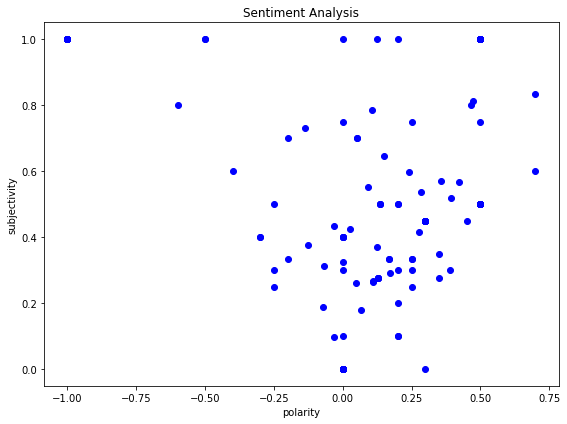

In [139]:
# Plotting
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df["polarity"][i], df["subjectivity"][i], color='Blue')  # plt.scatter(x,y,color)
print("\t\tHow People are reacting on "+ search_word + " by analysing "+ str(num_of_tweets) +" Tweets .")
#print("\t\t\t\t Negative polarity represents that the statement is negative \n Positive Represents the given statement is Positive a=\n 0 Polarity represents Neutral.")
plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.tight_layout()
plt.show()
